# Draw Gas & Electric Station on US Map

In [2]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import geopandas as gpd
from geopandas import GeoDataFrame

%matplotlib inline

## Parameters 

In [3]:
GAS_STATION_DATASET   = '../Processed_Data/gas_station.csv'
NEV_STATION_DATASET   = '../Processed_Data/station.csv'
STATE_INFO_DATA       = '../Processed_Data/States_Info.csv'

## Load Datasets

### Load the Gas Station dataset

In [4]:
df_Gas = pd.read_csv(GAS_STATION_DATASET,index_col=[0])
df_Gas = df_Gas.set_index("State")
print(df_Gas.shape)
df_Gas.head()

(51, 17)


,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
State,,,,,,,,,,,,,,,,,
Alabama,6000,5500,5390,5000,4500,4500,5000,5468,5360,5450,5500,6200,6150,6300,6300,6300,6300
Alaska,263,257,267,262,377,350,390,400,319,322,460,566,442,440,372,365,361
Arizona,4804,1907,1923,1950,2114,2110,2339,2400,2018,2277,2190,2000,2051,2037,2081,2063,2027
Arkansas,3280,3220,3313,2984,2831,2652,2652,2925,3185,3300,3300,2754,2540,2495,2350,2125,2107
California,14194,14200,11258,11258,11258,9520,9730,9750,9630,9822,9857,9970,10200,10400,10104,10100,10100


### Load new energy station dataset

In [5]:
df_NEV = pd.read_csv(NEV_STATION_DATASET,index_col=[0])
print(df_NEV.shape)
df_NEV.head()

(765, 9)


,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total,Year
State,,,,,,,,,
Alabama,11,3,6,0,0,0,40,60,2008
Alaska,0,1,0,0,0,0,10,11,2008
Arizona,10,40,23,5,1,5,51,135,2008
Arkansas,2,3,7,0,0,0,37,49,2008
California,36,184,13,376,26,28,199,862,2008


### Load State Info

In [6]:
df_State_Info = pd.read_csv(STATE_INFO_DATA,index_col=[0])
print(df_State_Info.shape)
df_State_Info.head()

(52, 3)


,Region,Geo Region,Party
States,,,
Alabama,Region_4,South,Republican
Alaska,Region_10,West,Republican
Arizona,Region_9,West,Democratic
Arkansas,Region_6,South,Republican
California,Region_9,West,Democratic


# Visualising Station Info

## Draw Station Comparation Graph

### Draw Graph For New Energy Station

<AxesSubplot:xlabel='Year'>

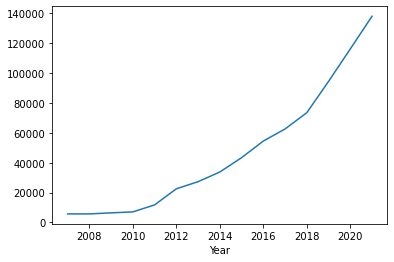

In [7]:
df_NEV['State'] = df_NEV.index
df_NEV_year = df_NEV.set_index('Year')
df_NEV_year['Total'].groupby('Year').sum().plot()

In [8]:
df_NEV.sort_values('Year')

,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total,Year,State
State,,,,,,,,,,
Montana,4,3,1,0,0,0,29,37,2007,Montana
Minnesota,1,1,353,0,0,0,30,385,2007,Minnesota
Michigan,17,13,60,0,7,0,69,166,2007,Michigan
Massachusetts,5,11,1,12,1,0,21,51,2007,Massachusetts
Maryland,8,14,12,0,0,0,13,47,2007,Maryland
...,...,...,...,...,...,...,...,...,...,...
Massachusetts,8,13,6,4871,2,0,30,4930,2021,Massachusetts
Michigan,10,23,245,1833,2,0,87,2200,2021,Michigan
Minnesota,157,23,454,1390,0,0,49,2073,2021,Minnesota


In [9]:
df_NEV_annual = df_NEV.groupby('Year').sum()
df_NEV_annual

,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total
Year,,,,,,,,
2007,633,771,1699,440,51,38,2110,5742
2008,633,771,1699,440,51,38,2110,5742
2009,660,803,1982,484,63,37,2420,6449
2010,615,869,2296,626,58,43,2604,7111
2011,633,941,2494,5070,56,43,2551,11788
2012,696,1190,2583,15192,58,66,2776,22561
2013,832,1290,2616,19472,53,84,2967,27314
2014,783,1495,2840,25602,51,103,2931,33805
2015,713,1607,3012,34151,35,117,3749,43384


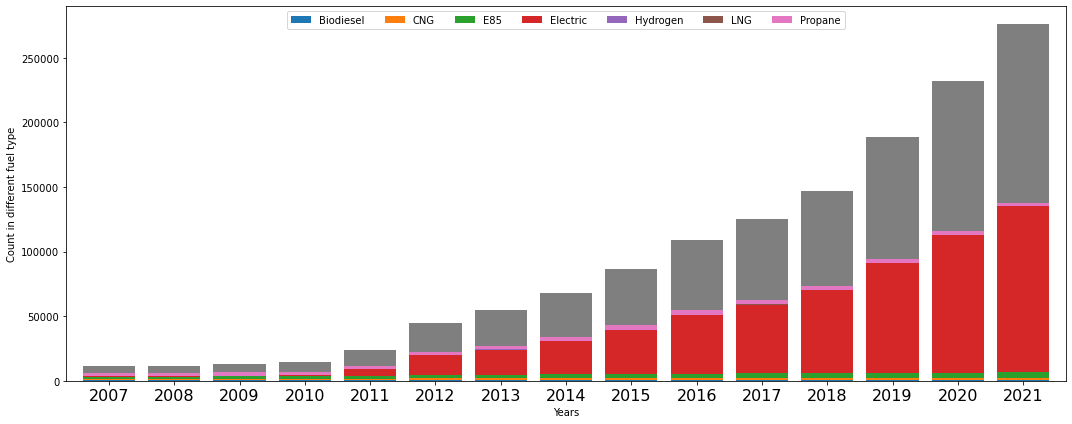

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))

df_NEV_annual.plot(ax=ax, kind='bar', stacked=True, width=.8)

ax.set_xlabel('Years')
ax.set_ylabel('Count in different fuel type')

ax.legend(['Biodiesel','CNG','E85','Electric','Hydrogen','LNG','Propane'], ncol=7, loc='upper center')

#ax.set_ylim(0, 200000)

ax.set_xticklabels(df_NEV_annual.index, rotation=0, fontsize=16)

fig.tight_layout()

Use Plotly draw some interactive graph

In [11]:
df_NEV_annual

,Biodiesel,CNG,E85,Electric,Hydrogen,LNG,Propane,Total
Year,,,,,,,,
2007,633,771,1699,440,51,38,2110,5742
2008,633,771,1699,440,51,38,2110,5742
2009,660,803,1982,484,63,37,2420,6449
2010,615,869,2296,626,58,43,2604,7111
2011,633,941,2494,5070,56,43,2551,11788
2012,696,1190,2583,15192,58,66,2776,22561
2013,832,1290,2616,19472,53,84,2967,27314
2014,783,1495,2840,25602,51,103,2931,33805
2015,713,1607,3012,34151,35,117,3749,43384


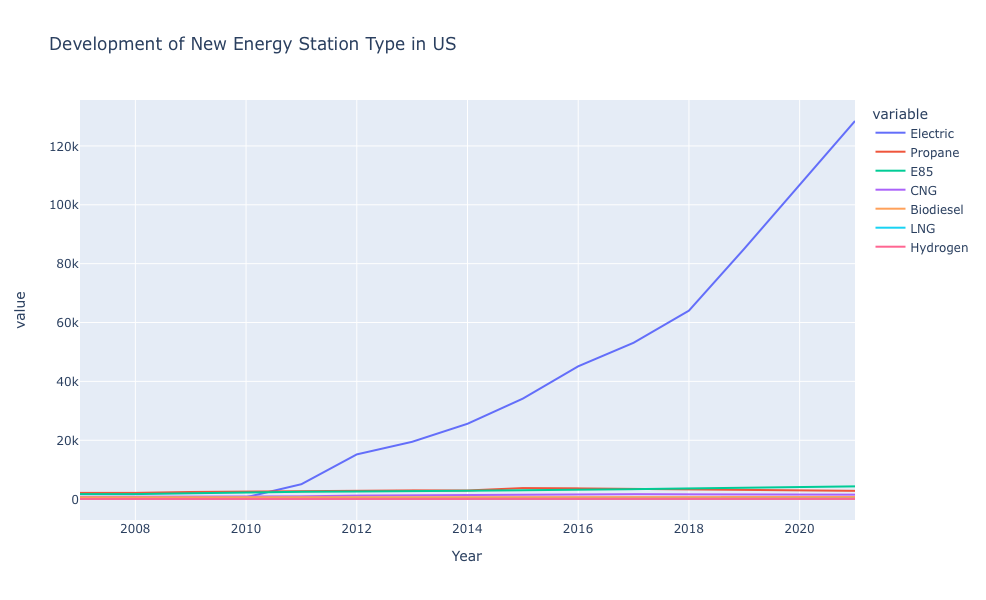

In [34]:
fig = px.line(df_NEV_annual, x=df_NEV_annual.index, y=['Electric','Propane','E85','CNG','Biodiesel','LNG','Hydrogen'], 
             title="Development of New Energy Station Type in US",
             height=600)
fig.show()

### Draw Line Graph for Gas & NEV Station

In [13]:
df_Gas_annual = pd.DataFrame(df_Gas.sum(axis=0)).rename(columns = {0:'Gas'})
df_Gas_annual.index = pd.to_numeric(df_Gas_annual.index, errors='coerce')

In [14]:
df_Station_annual = pd.DataFrame(df_NEV_annual['Total']).rename(columns = {'Total':'New_Energy'})

In [15]:
station_all = pd.concat([df_Station_annual, df_Gas_annual], axis=1)

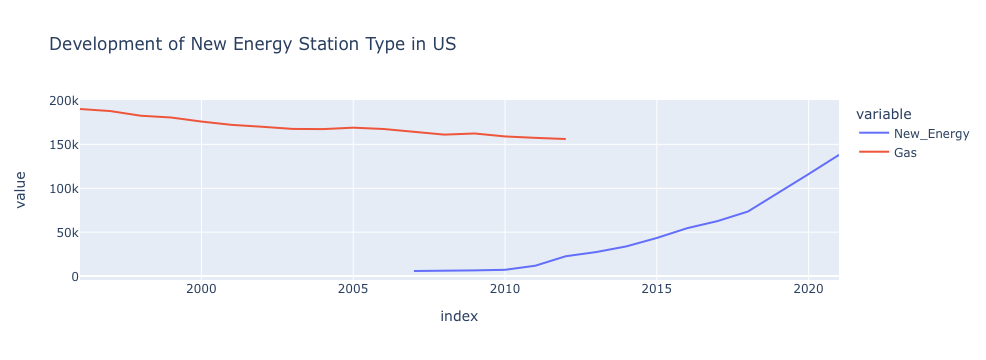

In [16]:
fig = px.line(station_all, x=station_all.index, y=['New_Energy','Gas'],
             title="Development of New Energy Station Type in US",
             height=300)
fig.show()

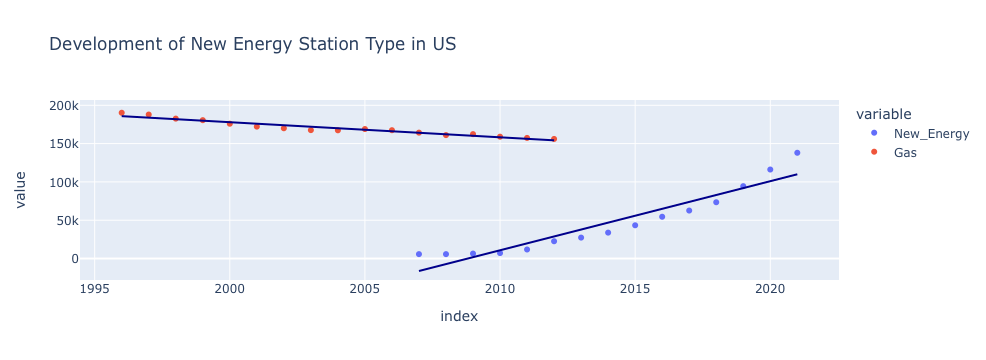

In [17]:
fig = px.scatter(station_all, x=station_all.index, y=['New_Energy','Gas'],
             title="Development of New Energy Station Type in US",
             height=300, trendline='ols', trendline_color_override='darkblue')
fig.show()

### Draw scatter plot for Gas & NEV Station in each State.

We use 2012 because it is the latest data from gas station dataset.

In [18]:
station_2012 = pd.concat([df_Gas['2012'].rename('Gas'), 
                          df_NEV[df_NEV['Year']==2012]['Total'].rename('New_Energy'),
                          df_State_Info
                         ], axis=1).dropna()
station_2012.head()

,Gas,New_Energy,Region,Geo Region,Party
Alabama,6300.0,12.0,Region_4,South,Republican
Alaska,361.0,198.0,Region_10,West,Republican
Arizona,2027.0,122.0,Region_9,West,Democratic
Arkansas,2107.0,682.0,Region_6,South,Republican
California,10100.0,4261.0,Region_9,West,Democratic


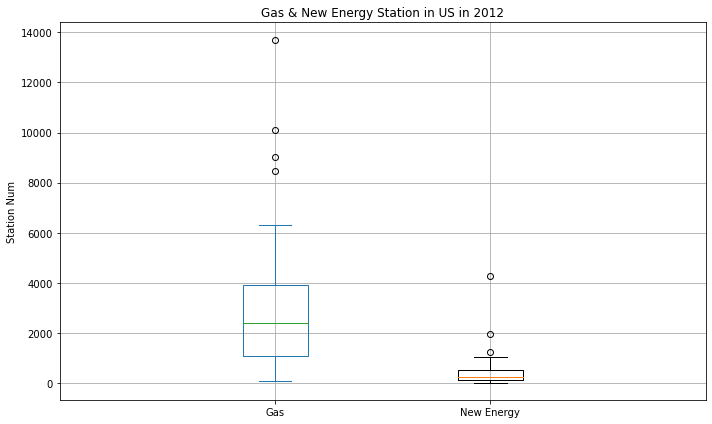

In [22]:
fig, ax = plt.subplots(figsize=(10, 6))

station_2012[['Gas']].plot(kind='box', ax=ax)

ax.boxplot(station_2012['New_Energy'],positions=[1.5])

ax.set_ylabel('Station Num')
ax.set_xticklabels(('Gas','New Energy'))
plt.title('Gas & New Energy Station in US in 2012')

ax.grid(c='darkgrey')
#bx.grid(c='lightgrey')

fig.tight_layout()

fig.savefig('./Outputs/Station_Compare_2012_in_US.png', format='png')

### Gas vs. NEV By GeoRegion & Party 

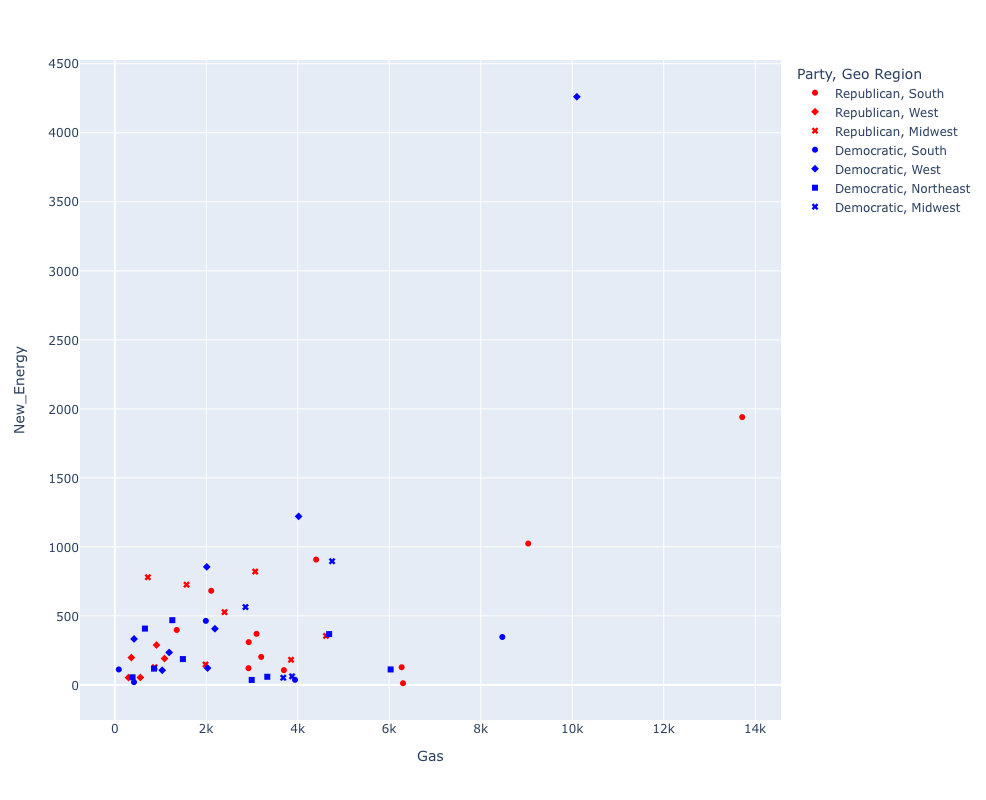

In [20]:
fig = px.scatter(station_2012, x="Gas", y="New_Energy", 
                 color="Party",color_discrete_sequence=["red", "blue"],
                 symbol="Geo Region", hover_name=station_2012.index,
                 width=1100, height=800)
fig.show()

### Gas vs. NEV By GeoRegion

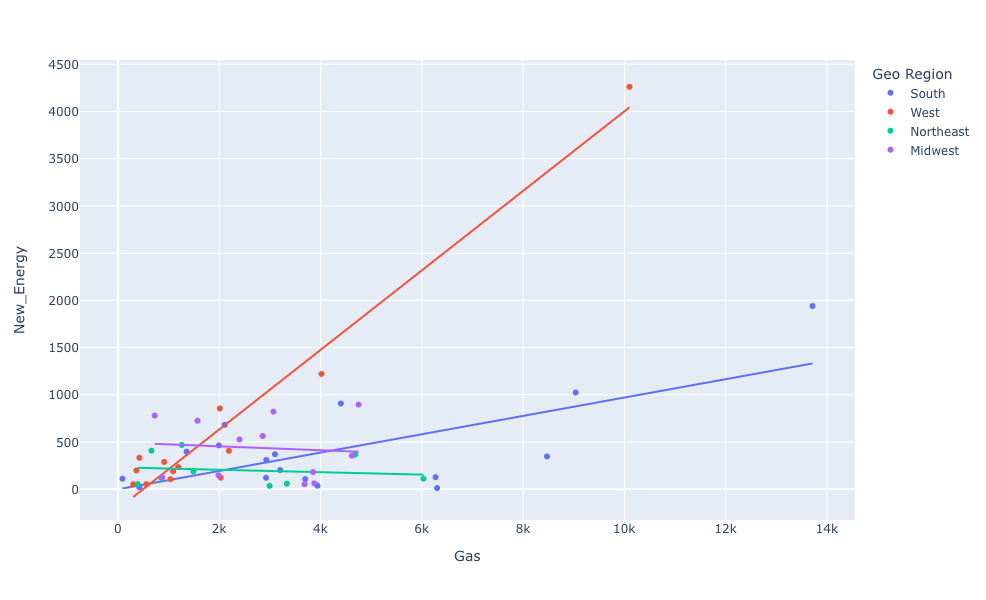

In [19]:
fig = px.scatter(station_2012, x="Gas", y="New_Energy", 
                 color="Geo Region",
                 hover_name=station_2012.index,
                 trendline="ols",
                 height=600)
fig.show()

### Gas vs. NEV By Party 

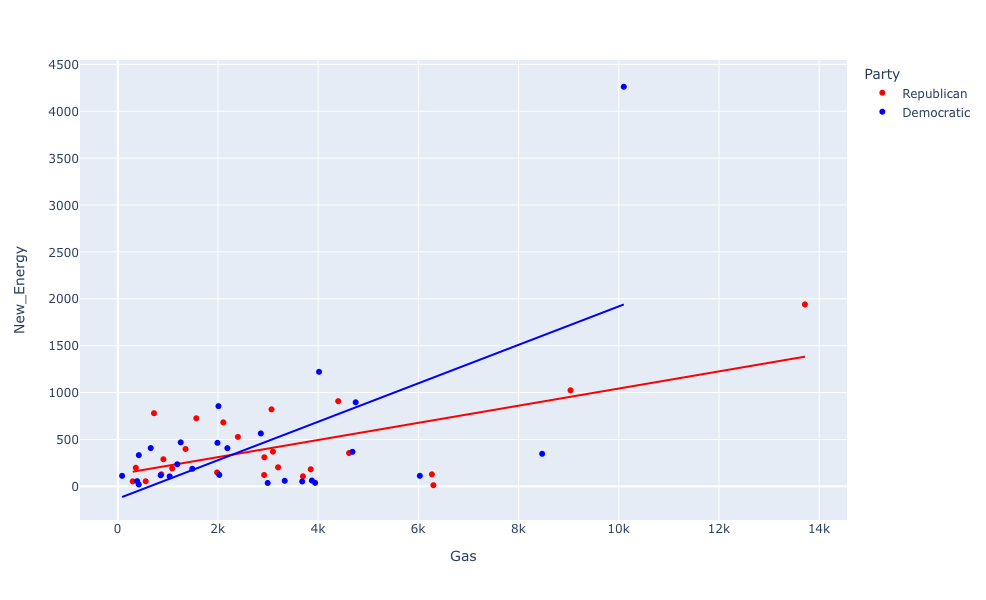

In [20]:
fig = px.scatter(station_2012, x="Gas", y="New_Energy", 
                 color="Party",color_discrete_sequence=["red", "blue"],
                 hover_name=station_2012.index,
                 trendline="ols",
                 height=600)
fig.show()

## Predict for Gas Station From 2012-2021 & Show Overall Trend


In [440]:
np.append(np.arange(1996,2006,1),np.arange(2021,2031,1))


array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2021,
       2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030])

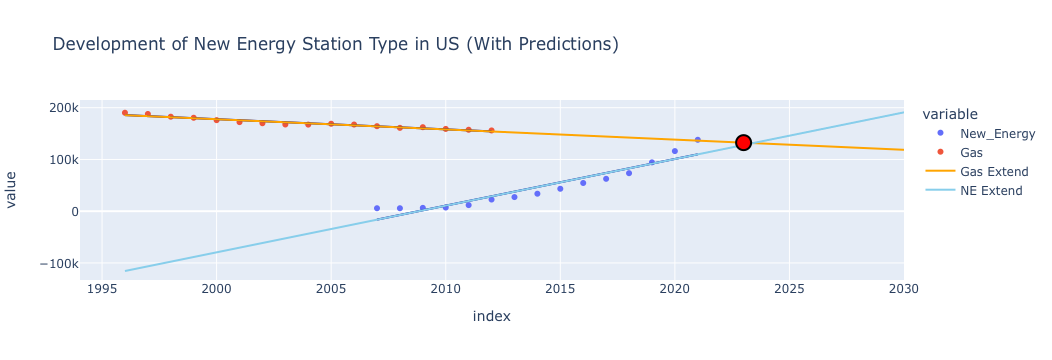

In [488]:
#fig, ax = plt.subplots()
fig = px.scatter(station_all, x=station_all.index, y=['New_Energy','Gas'],
             title="Development of New Energy Station Type in US (With Predictions)",
             height=300, trendline='ols', trendline_color_override='darkblue')

# Past & Future Years
years = np.append(np.arange(1996,2006,1),np.arange(2021,2031,1))

fig.add_trace(
    go.Scatter(x=years, y=-1976.37*years+4.13069e+06, name="Gas Extend", line_shape='linear', line_color='orange') 
)
fig.add_trace(
    go.Scatter(x=years, y=9021.52*years+-1.81225e+07, name="NE Extend", line_shape='linear', line_color='skyblue')
)

# Calculate the year of two line intersect
year_of_intersection = round((1.81225e+07+4.13069e+06)/(9021.52+1976.37),0)

# Add mark on intersection point
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=[year_of_intersection],
        y=[-1976.37*year_of_intersection+4.13069e+06],
        marker=dict(
            color='Red',
            size=15,
            line=dict(
                color='black',
                width=2
            )
        ),
        showlegend=False
    )
)

fig.show()
#model = px.get_trendline_results(fig)
#params = model.px_fit_results.iloc[0].params

# Show Trend For Each State
above are specific in 2012, we try to generate some graph from 2007 - 2012

In [196]:
df_Gas_07_12 = df_Gas[df_Gas.columns[11:]]
df_Gas_07_12.head()

,2007,2008,2009,2010,2011,2012
State,,,,,,
Alabama,6200,6150,6300,6300,6300,6300
Alaska,566,442,440,372,365,361
Arizona,2000,2051,2037,2081,2063,2027
Arkansas,2754,2540,2495,2350,2125,2107
California,9970,10200,10400,10104,10100,10100


In [247]:
df_NEV_07_12 = pd.DataFrame()

years = np.arange(2007,2013,1)  
for year in years:
    df_NEV_07_12 = pd.concat([df_NEV_07_12,
                              df_NEV[df_NEV['Year']==year]['Total'].rename(str(year)),
                             ], axis = 1)
    
df_NEV_07_12.head()

,2007,2008,2009,2010,2011,2012
Alabama,60,60,191,153,9,12
Alaska,11,11,11,11,148,198
Arizona,135,135,143,157,91,122
Arkansas,49,49,63,75,189,682
California,862,862,937,1011,2006,4261


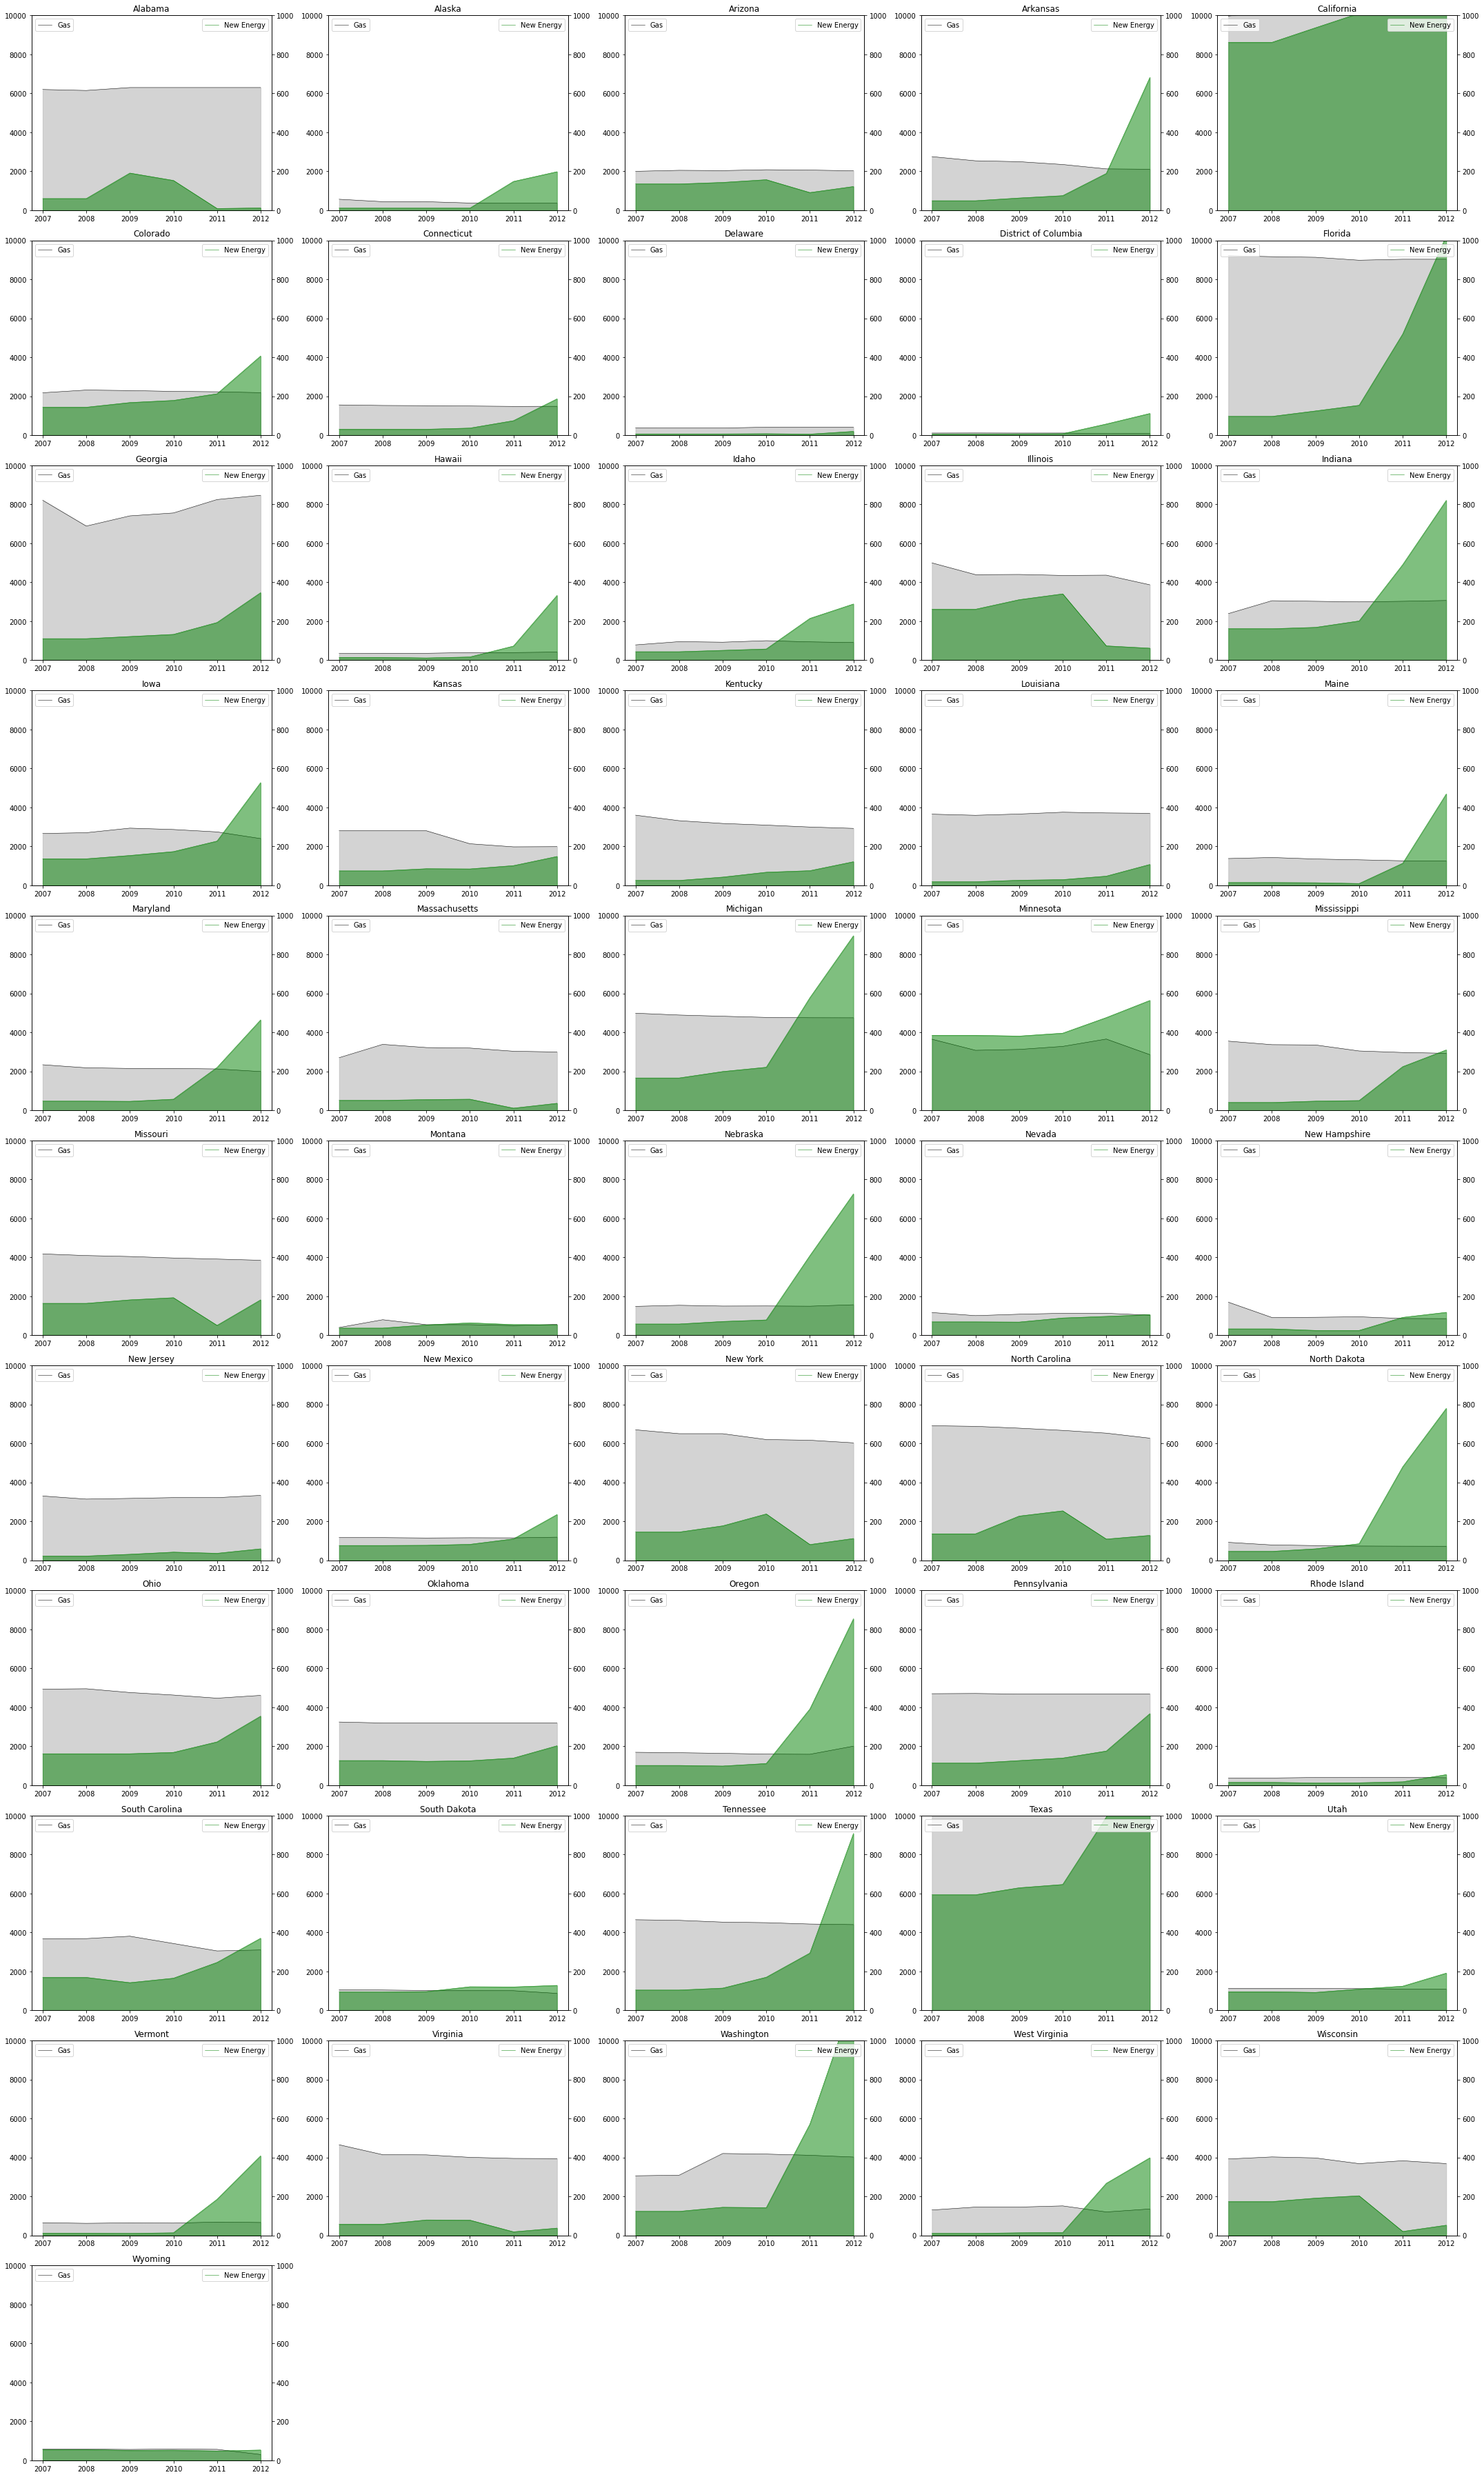

In [374]:
def draw_state_trend(ax,bx,state_gas,state_NEV):
    ax.set_ylim(0, 10000)
    bx = ax.twinx()
    bx.set_ylim(0,1000)

    state_gas.plot(ax=ax, c='black', lw=0.5, label='Gas')
    ax.fill_between(state_gas.index, 0, state_gas, color='darkgrey', alpha=.5)

    state_NEV.plot(ax=bx, c='Green', lw=0.5, label='New Energy')
    bx.fill_between(state_NEV.index, 0, state_NEV, color='green', alpha=.5)

    ax.legend(loc='upper left')
    bx.legend(loc='upper right')
    
    plt.title(state_gas.name)
    
    
fig, ax = plt.subplots(figsize=(30, 50))
# Remove unnecessary tick marks.
plt.axis('off')
for i in range(0,51):
    ax = bx = fig.add_subplot(11,5,i+1)
    draw_state_trend(ax=ax,bx=bx,
                     state_gas = df_Gas_07_12.iloc[i],
                     state_NEV = df_NEV_07_12.iloc[i]
                    )    
fig.align_labels()
fig.tight_layout()

# Save as png image
fig.savefig('./Outputs/Station_2007to2012_by_states.png', format='png')